In [1]:
#libraries
import tensorflow.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from tensorflow.keras.layers import Input , Dense , Activation, Flatten , Conv2D , MaxPool2D ,Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import categorical_crossentropy   #for binary classification only
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau  #for stop over fitting
from tensorflow.keras import metrics
from keras.utils import to_categorical
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay ,accuracy_score ,precision_score, recall_score, roc_auc_score, roc_curve, auc ,f1_score,precision_recall_curve
from imblearn.metrics import specificity_score, sensitivity_score
from skimage import transform
import matplotlib.pyplot as plt
import numpy as np
import shutil
import os
import math
import seaborn as sns
import pandas as pd
import sklearn
import sys
import glob

2024-09-27 10:56:56.307353: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-27 10:56:56.307416: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-27 10:56:56.309063: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
pip install tensorflow==2.15

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [3]:
print("Python version is", sys.version)
print("Scikit-learn version is: ", sklearn.__version__)
print("Tensorflow version is: ", tf.__version__)

Python version is 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]
Scikit-learn version is:  1.2.2
Tensorflow version is:  2.15.0


In [4]:
main_direction_path = r'/kaggle/input/ear-5fold/data1 - 282image 7class - unsharpe - aug - CLAHE - 5Fold/fold 1'
print(main_direction_path)

/kaggle/input/ear-5fold/data1 - 282image 7class - unsharpe - aug - CLAHE - 5Fold/fold 1


In [5]:
train_folder_path = main_direction_path + '/train'
test_folder_path = main_direction_path + '/test'

In [6]:
#for train
aom_path_train_path = train_folder_path + '/AOM/'
csom_path_train_path = train_folder_path +'/CSOM/'
earwax_path_train_path = train_folder_path + '/Earwax/'
normal_path_train_path = train_folder_path +'/Normal/'
Miringoskleroz_path_train_path = train_folder_path + '/Miringoskleroz/'
otitisexterna_path_train_path = train_folder_path +'/OtitisEksterna/'


#for test
aom_path_test_path  = test_folder_path + '/AOM/'
csom_path_test_path  = test_folder_path +'/CSOM/'
earwax_path_test_path  = test_folder_path + '/Earwax/'
normal_path_test_path  = test_folder_path +'/Normal/'
Miringoskleroz_path_test_path  = test_folder_path + '/Miringoskleroz/'
otitisexterna_path_test_path  = test_folder_path +'/OtitisEksterna/'


In [7]:
totatl_train_images = (len(os.listdir(aom_path_train_path)) +
                       len(os.listdir(csom_path_train_path)) +
                       len(os.listdir(earwax_path_train_path)) +
                       len(os.listdir(normal_path_train_path)) +
                       len(os.listdir(Miringoskleroz_path_train_path)) +
                       len(os.listdir(otitisexterna_path_train_path)))

print(totatl_train_images)

871


In [8]:
totatl_test_images = (len(os.listdir(aom_path_test_path)) +
                       len(os.listdir(csom_path_test_path)) +
                       len(os.listdir(earwax_path_test_path)) +
                       len(os.listdir(normal_path_test_path)) +
                       len(os.listdir(Miringoskleroz_path_test_path)) +
                       len(os.listdir(otitisexterna_path_test_path)))

print(totatl_test_images)

217


In [9]:
classes_name = list(os.listdir(train_folder_path))
classes_name

['OtitisEksterna', 'Miringoskleroz', 'CSOM', 'Earwax', 'Normal', 'AOM']

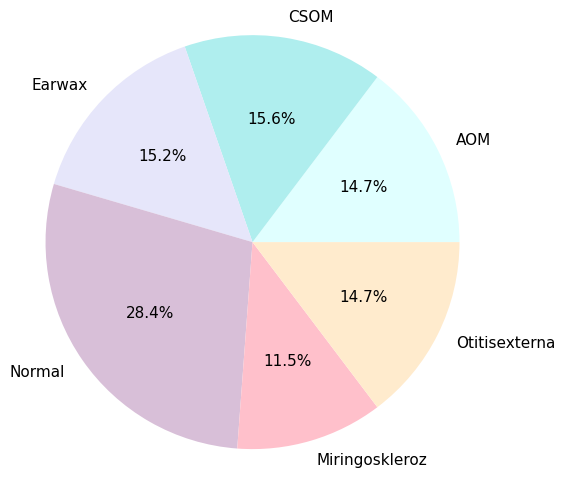

In [10]:
x = np.array([len(os.listdir(aom_path_train_path)),len(os.listdir(csom_path_train_path)),
              len(os.listdir(earwax_path_train_path)),len(os.listdir(normal_path_train_path)),
              len(os.listdir(Miringoskleroz_path_train_path)),len(os.listdir(otitisexterna_path_train_path))])
labels = ['AOM', 'CSOM', 'Earwax', 'Normal', 'Miringoskleroz', 'Otitisexterna']
plt.pie(x, labels = labels, autopct = '%.1f%%', radius= 1.4, textprops={'fontsize': 11}, colors=['#E0FFFF','#AFEEEE','#E6E6FA','#D8BFD8','#FFC0CB','#FFEBCD'])
plt.savefig("pie_chart.png")
plt.show()

In [11]:

'''
img_datagen = ImageDataGenerator(rescale = 1./255,
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255,
                                   #preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
                                   )


training_set = img_datagen.flow_from_directory(train_folder_path,
                                                     target_size = (224, 224),
                                                     batch_size = 32,
                                                     class_mode='categorical',
                                                     )

test_set = test_datagen.flow_from_directory(test_folder_path,
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          shuffle=False
                                      )
 '''                                     

"\nimg_datagen = ImageDataGenerator(rescale = 1./255,\n                                   )\n\ntest_datagen = ImageDataGenerator(rescale = 1./255,\n                                   #preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,\n                                   )\n\n\ntraining_set = img_datagen.flow_from_directory(train_folder_path,\n                                                     target_size = (224, 224),\n                                                     batch_size = 32,\n                                                     class_mode='categorical',\n                                                     )\n\ntest_set = test_datagen.flow_from_directory(test_folder_path,\n                                          target_size = (224, 224),\n                                          batch_size = 32,\n                                          shuffle=False\n                                      )\n "

In [12]:
SIZE = 224

In [13]:
train_images = []
train_labels = [] 

In [14]:
for directory_path in glob.glob(r'/kaggle/input/ear-5fold/data1 - 282image 7class - unsharpe - aug - CLAHE - 5Fold/fold 1/train/*'):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
       # print(img_path)
        
        img = plt.imread(img_path)       
      #  img = transform.rescale(img, 1./255 ,anti_aliasing=True)
        img = transform.resize(img, (SIZE, SIZE, 3),anti_aliasing=True)

        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

OtitisEksterna
Miringoskleroz
CSOM
Earwax
Normal
AOM


In [15]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [16]:
len(train_images)

871

In [17]:
len(train_labels)

871

In [18]:
img.shape

(224, 224, 3)

In [19]:
test_images = []
test_labels = [] 

In [20]:
for directory_path in glob.glob(r'/kaggle/input/ear-5fold/data1 - 282image 7class - unsharpe - aug - CLAHE - 5Fold/fold 1/test/*'):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
       # print(img_path)
        
        img = plt.imread(img_path)       
    #    img = transform.rescale(img, 1./255 ,anti_aliasing=True)
        img = transform.resize(img, (SIZE, SIZE, 3),anti_aliasing=True)

        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

OtitisEksterna
Miringoskleroz
CSOM
Earwax
Normal
AOM


In [21]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [22]:
len(test_images)

217

In [23]:
len(test_labels)

217

In [24]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [25]:
y_train = to_categorical(train_labels_encoded, 6)

In [26]:
y_test = to_categorical(test_labels_encoded, 6)

## Non trainable

In [44]:
input_shape = (224,224,3)
model = tf.keras.applications.MobileNet(input_shape = input_shape,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classifier_activation="softmax",
)

model.trainable = False

global_average_pooling = GlobalAveragePooling2D()(model.output)
fc1 = Dense(units = 55, activation = 'tanh', name = 'Dense1_tuned')(global_average_pooling)
dropout1 = Dropout(rate = 0.1, 
                      # seed = 123, 
                   name = 'dropout_tuned')(fc1)
fc2 = Dense(units = 50, activation = 'relu' , name = 'Dense2_tuned')(dropout1)
    
output_layer = Dense(6, activation = 'softmax', name = 'output_layer')(fc2)
model1 = Model(model.input, output_layer)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate = 0.0007,
            decay_steps=300,
            decay_rate=0.9)

model1.compile(optimizer= Adam(learning_rate=lr_schedule), loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
%time hist1 = model1.fit(train_images, y_train, epochs=20, validation_data = (test_images,y_test), verbose=1,batch_size = 16)

Epoch 1/20
55/55 [==============================] - 4s 42ms/step - loss: 1.5345 - accuracy: 0.3949 - val_loss: 1.1835 - val_accuracy: 0.6129
Epoch 2/20
55/55 [==============================] - 1s 25ms/step - loss: 0.9528 - accuracy: 0.7038 - val_loss: 0.7328 - val_accuracy: 0.8341
Epoch 3/20
55/55 [==============================] - 1s 25ms/step - loss: 0.5942 - accuracy: 0.8393 - val_loss: 0.5097 - val_accuracy: 0.8433
Epoch 4/20
55/55 [==============================] - 1s 25ms/step - loss: 0.3733 - accuracy: 0.9013 - val_loss: 0.3912 - val_accuracy: 0.8710
Epoch 5/20
55/55 [==============================] - 1s 25ms/step - loss: 0.2425 - accuracy: 0.9449 - val_loss: 0.3178 - val_accuracy: 0.9032
Epoch 6/20
55/55 [==============================] - 1s 25ms/step - loss: 0.1728 - accuracy: 0.9633 - val_loss: 0.2461 - val_accuracy: 0.9217
Epoch 7/20
55/55 [==============================] - 1s 26ms/step - loss: 0.1181 - accuracy: 0.9736 - val_loss: 0.2084 - val_accuracy: 0.9493
Epoch 8/20
55

In [46]:
hist1_df = pd.DataFrame(hist1.history)
hist1_df 

,loss,accuracy,val_loss,val_accuracy
0,1.534489,0.394948,1.183462,0.612903
1,0.952773,0.703789,0.732849,0.834101
2,0.594215,0.839265,0.509700,0.843318
3,0.373271,0.901263,0.391185,0.870968
4,0.242479,0.944891,0.317843,0.903226
5,0.172811,0.963261,0.246066,0.921659
6,0.118093,0.973594,0.208450,0.949309
7,0.092111,0.982778,0.205294,0.953917
8,0.061963,0.988519,0.170116,0.958525
9,0.043966,0.996556,0.158575,0.953917


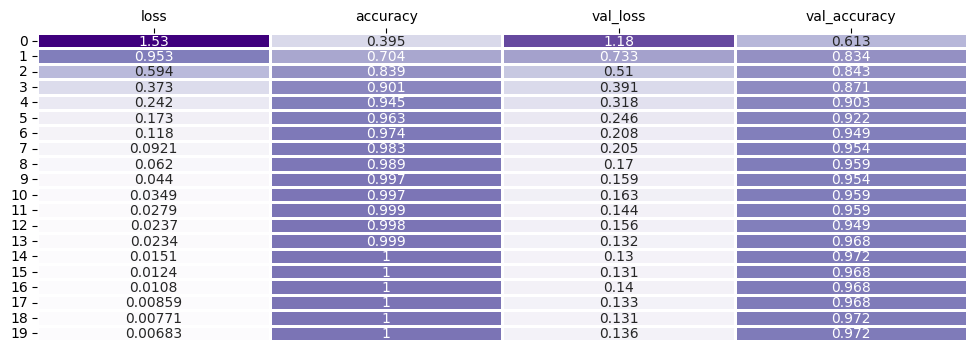

In [47]:
plt.figure(figsize=(12,4))
ax=sns.heatmap(hist1_df,cbar=False, annot=True, fmt=".3g", cmap= 'Purples', linewidths = 1 )
plt.savefig("hist_mobilenet_nontrainable.png")
ax.xaxis.tick_top()

In [48]:
hist1_df.to_excel('hist_mobilenet_nontrainable.xlsx', index = True)
hist1_df

,loss,accuracy,val_loss,val_accuracy
0,1.534489,0.394948,1.183462,0.612903
1,0.952773,0.703789,0.732849,0.834101
2,0.594215,0.839265,0.509700,0.843318
3,0.373271,0.901263,0.391185,0.870968
4,0.242479,0.944891,0.317843,0.903226
5,0.172811,0.963261,0.246066,0.921659
6,0.118093,0.973594,0.208450,0.949309
7,0.092111,0.982778,0.205294,0.953917
8,0.061963,0.988519,0.170116,0.958525
9,0.043966,0.996556,0.158575,0.953917


In [49]:
Y_pred1 = model1.predict(test_images)
y_pred_class1 = np.argmax(Y_pred1 ,  axis = 1)

7/7 [==============================] - 2s 161ms/step


In [50]:
loss, acc = model1.evaluate(test_images,y_test)

7/7 [==============================] - 0s 35ms/step - loss: 0.1360 - accuracy: 0.9724


In [51]:
accuracy1 = accuracy_score(test_labels_encoded, y_pred_class1)
accuracy1

0.9723502304147466

In [52]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['AOM', 'CSOM', 'Earwax','Miringoskleroz','Normal','Otitisexterna']
label_names = [0,1,2,3,4,5]

cm = confusion_matrix(test_labels_encoded, y_pred_class1, labels = label_names)

print('Confusion Matrix')
print(confusion_matrix(test_labels_encoded, y_pred_class1))

print('classification_Report')
print(classification_report(test_labels_encoded, y_pred_class1, target_names=target_names))

Confusion Matrix
[[31  0  0  0  1  0]
 [ 0 34  0  0  0  0]
 [ 0  0 32  0  1  0]
 [ 0  0  0 25  0  0]
 [ 4  0  0  0 57  0]
 [ 0  0  0  0  0 32]]
classification_Report
                precision    recall  f1-score   support

           AOM       0.89      0.97      0.93        32
          CSOM       1.00      1.00      1.00        34
        Earwax       1.00      0.97      0.98        33
Miringoskleroz       1.00      1.00      1.00        25
        Normal       0.97      0.93      0.95        61
 Otitisexterna       1.00      1.00      1.00        32

      accuracy                           0.97       217
     macro avg       0.98      0.98      0.98       217
  weighted avg       0.97      0.97      0.97       217



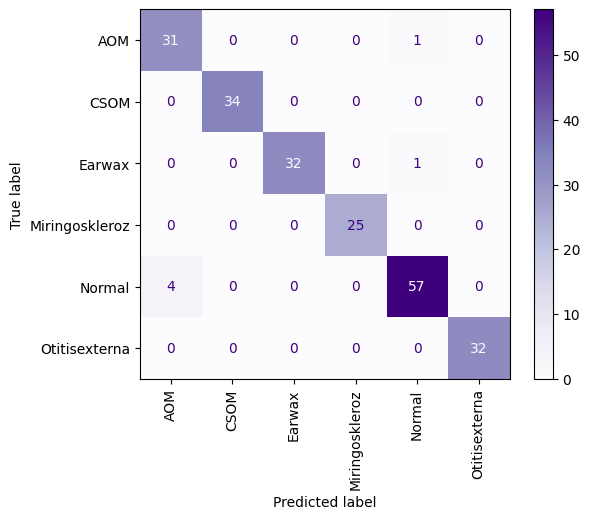

In [53]:
#plt.figure(figsize=(16,16))
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Purples, values_format = 'g',xticks_rotation = 'vertical')
plt.savefig("cf_mobilenet_nontrainable.png")
plt.show()

In [54]:
df1 = pd.DataFrame(cm)
print(df1)

    0   1   2   3   4   5
0  31   0   0   0   1   0
1   0  34   0   0   0   0
2   0   0  32   0   1   0
3   0   0   0  25   0   0
4   4   0   0   0  57   0
5   0   0   0   0   0  32


In [55]:
report = classification_report(test_labels_encoded, y_pred_class1, target_names=target_names)
print(report)

                precision    recall  f1-score   support

           AOM       0.89      0.97      0.93        32
          CSOM       1.00      1.00      1.00        34
        Earwax       1.00      0.97      0.98        33
Miringoskleroz       1.00      1.00      1.00        25
        Normal       0.97      0.93      0.95        61
 Otitisexterna       1.00      1.00      1.00        32

      accuracy                           0.97       217
     macro avg       0.98      0.98      0.98       217
  weighted avg       0.97      0.97      0.97       217



In [56]:
#from tensorflow.keras.utils import to_categorical
y_true = test_labels_encoded

In [57]:
print("specificity: "+ str(specificity_score(y_true, y_pred_class1, average=None)))
print("sensitivity: "+ str(sensitivity_score(y_true, y_pred_class1, average=None)))
print("Precision: "+ str(precision_score(y_true, y_pred_class1, average=None)))
print("Recall: "+ str(recall_score(y_true, y_pred_class1, average=None)))
print("f1_score: "+ str(f1_score(y_true, y_pred_class1, average=None)))
print("weighted Roc score: " + str(roc_auc_score(y_true,Y_pred1,multi_class='ovr',average=None)))

specificity: [0.97837838 1.         1.         1.         0.98717949 1.        ]
sensitivity: [0.96875    1.         0.96969697 1.         0.93442623 1.        ]
Precision: [0.88571429 1.         1.         1.         0.96610169 1.        ]
Recall: [0.96875    1.         0.96969697 1.         0.93442623 1.        ]
f1_score: [0.92537313 1.         0.98461538 1.         0.95       1.        ]
weighted Roc score: [0.98699324 1.         0.99917655 1.         0.98823035 1.        ]


In [58]:
specificity_non = specificity_score(y_true, y_pred_class1, average='weighted')
sensitivity_non = sensitivity_score(y_true, y_pred_class1, average='weighted')
Precision_non = precision_score(y_true, y_pred_class1, average='weighted')
Recall_non = recall_score(y_true, y_pred_class1, average='weighted')
f1_score_non = f1_score(y_true, y_pred_class1, average='weighted')
Roc_score_non = roc_auc_score(y_true,Y_pred1,multi_class='ovr',average='weighted')
accuracy_non = accuracy_score(y_true, y_pred_class1)

In [59]:
print("specificity: "+ str(specificity_non))
print("sensitivity: "+ str(sensitivity_non))
print("Precision: "+ str(Precision_non))
print("Recall: "+ str(Recall_non))
print("f1_score: "+ str(f1_score_non))
print("weighted Roc score: " + str(Roc_score_non))
print("accuracy : " + str(accuracy_non))

specificity: 0.993207635143119
sensitivity: 0.9723502304147466
Precision: 0.973617790473215
Recall: 0.9723502304147466
f1_score: 0.9726002211558302
weighted Roc score: 0.9946482080773806
accuracy : 0.9723502304147466


## trainable

In [124]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Checkpoint to save best model per epoch
model_file_path = "saved_models/model1_mobilenet-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint1 = ModelCheckpoint(
    filepath=model_file_path,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

In [125]:
input_shape = (224,224,3)
model = tf.keras.applications.MobileNet(input_shape = input_shape,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classifier_activation="softmax",
)

#model.trainable = False

global_average_pooling = GlobalAveragePooling2D()(model.output)
fc1 = Dense(units = 55, activation = 'tanh', name = 'Dense1_tuned')(global_average_pooling)
dropout1 = Dropout(rate = 0.1, 
                      # seed = 123, 
                   name = 'dropout_tuned')(fc1)
fc2 = Dense(units = 50, activation = 'relu' , name = 'Dense2_tuned')(dropout1)
    
output_layer = Dense(6, activation = 'softmax', name = 'output_layer')(fc2)
model = Model(model.input, output_layer)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate = 0.0007,
            decay_steps=300,
            decay_rate=0.9)

model.compile(optimizer= Adam(learning_rate=lr_schedule), loss='categorical_crossentropy',metrics=['accuracy'])

In [126]:
%time hist = model.fit(train_images, y_train, epochs=15, validation_data = (test_images,y_test) ,callbacks=[checkpoint1], verbose=1,batch_size = 16)

Epoch 1/15
54/55 [============================>.] - ETA: 0s - loss: 0.7100 - accuracy: 0.7789
Epoch 1: val_accuracy improved from -inf to 0.52074, saving model to saved_models/model1_mobilenet-01-0.5207.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


55/55 [==============================] - 16s 86ms/step - loss: 0.7094 - accuracy: 0.7796 - val_loss: 1.6826 - val_accuracy: 0.5207
Epoch 2/15
54/55 [============================>.] - ETA: 0s - loss: 0.1742 - accuracy: 0.9572
Epoch 2: val_accuracy improved from 0.52074 to 0.85253, saving model to saved_models/model1_mobilenet-02-0.8525.h5
55/55 [==============================] - 4s 68ms/step - loss: 0.1740 - accuracy: 0.9575 - val_loss: 0.5159 - val_accuracy: 0.8525
Epoch 3/15
54/55 [============================>.] - ETA: 0s - loss: 0.1916 - accuracy: 0.9352
Epoch 3: val_accuracy did not improve from 0.85253
55/55 [==============================] - 3s 63ms/step - loss: 0.1904 - accuracy: 0.9357 - val_loss: 0.9984 - val_accuracy: 0.7051
Epoch 4/15
54/55 [============================>.] - ETA: 0s - loss: 0.1996 - accuracy: 0.9317
Epoch 4: val_accuracy did not improve from 0.85253
55/55 [==============================] - 3s 63ms/step - loss: 0.1982 - accuracy: 0.9323 - val_loss: 1.2242 - v

In [127]:
hist_df = pd.DataFrame(hist.history)
hist_df 

,loss,accuracy,val_loss,val_accuracy
0,0.709418,0.779564,1.682650,0.520737
1,0.173956,0.957520,0.515862,0.852535
2,0.190442,0.935706,0.998365,0.705069
3,0.198193,0.932262,1.224198,0.576037
4,0.089201,0.978186,0.076488,0.972350
5,0.072781,0.975890,0.251780,0.894009
6,0.112032,0.967853,0.058142,0.981567
7,0.057506,0.986223,0.167948,0.944700
8,0.060671,0.978186,0.234733,0.898618
9,0.075541,0.977038,1.278695,0.705069


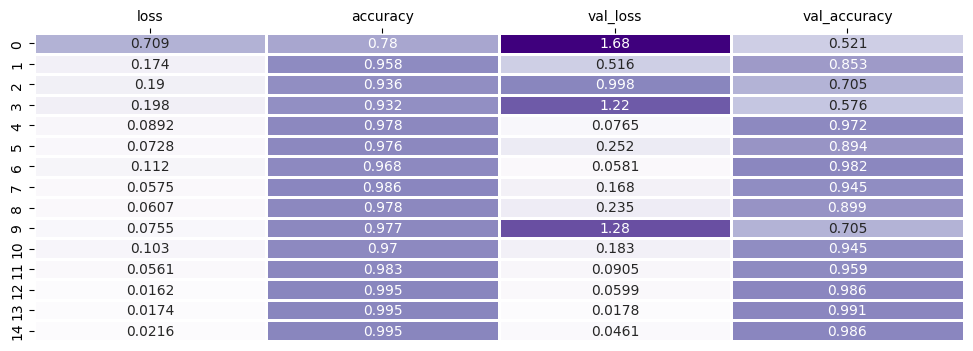

In [128]:
plt.figure(figsize=(12,4))
ax=sns.heatmap(hist_df,cbar=False, annot=True, fmt=".3g", cmap= 'Purples', linewidths = 1 )
plt.savefig("hist_mobilenet_nontrainable.png")
ax.xaxis.tick_top()

In [129]:
hist_df.to_excel('hist_mobilenet_nontrainable.xlsx', index = True)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.709418,0.779564,1.682650,0.520737
1,0.173956,0.957520,0.515862,0.852535
2,0.190442,0.935706,0.998365,0.705069
3,0.198193,0.932262,1.224198,0.576037
4,0.089201,0.978186,0.076488,0.972350
5,0.072781,0.975890,0.251780,0.894009
6,0.112032,0.967853,0.058142,0.981567
7,0.057506,0.986223,0.167948,0.944700
8,0.060671,0.978186,0.234733,0.898618
9,0.075541,0.977038,1.278695,0.705069


In [130]:
model.save('saved_models/model1_mobilenet.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [131]:
img = np.expand_dims(test_images[0], axis=0)

In [132]:
img.shape

(1, 224, 224, 3)

In [133]:
Y_pred_img = model.predict(img)
print(Y_pred_img)
Y_pred_img_class = np.argmax(Y_pred_img ,  axis = 1)
print(Y_pred_img_class)

1/1 [==============================] - 1s 1s/step
[[1.8903787e-03 9.1486647e-05 2.1884528e-03 1.8088652e-04 4.3355997e-04
  9.9521530e-01]]
[5]


In [134]:
Y_pred = model.predict(test_images)
y_pred_class = np.argmax(Y_pred ,  axis = 1)

7/7 [==============================] - 0s 33ms/step


In [135]:
Y_pred = pd.DataFrame(Y_pred)
Y_pred

,0,1,2,3,4,5
0,0.001890,0.000091,0.002188,0.000181,0.000434,0.995215
1,0.000128,0.000149,0.000724,0.000082,0.002369,0.996547
2,0.000098,0.000072,0.000451,0.000064,0.000910,0.998405
3,0.000094,0.000087,0.001285,0.000048,0.002199,0.996287
4,0.000089,0.000069,0.000733,0.000039,0.000653,0.998417
...,...,...,...,...,...,...
212,0.998794,0.000032,0.000340,0.000270,0.000421,0.000143
213,0.998823,0.000031,0.000361,0.000254,0.000380,0.000150
214,0.998655,0.000036,0.000344,0.000303,0.000499,0.000163
215,0.998790,0.000032,0.000310,0.000259,0.000441,0.000168


In [136]:
loss, acc = model.evaluate(test_images,y_test)

7/7 [==============================] - 0s 44ms/step - loss: 0.0461 - accuracy: 0.9862


In [137]:
accuracy2 = accuracy_score(test_labels_encoded, y_pred_class)
accuracy2

0.9861751152073732

In [138]:
from keras.models import load_model
model1_loaded = load_model(r'/kaggle/working/saved_models/model1_mobilenet-13-0.9862.h5')

In [139]:
Y_pred_loaded = model1_loaded.predict(test_images)
y_pred_class_loaded = np.argmax(Y_pred_loaded ,  axis = 1)

7/7 [==============================] - 1s 41ms/step


In [140]:
loss, acc = model1_loaded.evaluate(test_images,y_test)

7/7 [==============================] - 1s 35ms/step - loss: 0.0599 - accuracy: 0.9862


In [141]:
accuracy_loaded = accuracy_score(test_labels_encoded, y_pred_class_loaded)
accuracy_loaded

0.9861751152073732

In [142]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['AOM', 'CSOM', 'Earwax','Miringoskleroz','Normal','Otitisexterna']
label_names = [0,1,2,3,4,5]

cm = confusion_matrix(test_labels_encoded, y_pred_class_loaded, labels = label_names)

print('Confusion Matrix')
print(confusion_matrix(test_labels_encoded, y_pred_class_loaded))

print('classification_Report')
print(classification_report(test_labels_encoded, y_pred_class_loaded, target_names=target_names))

Confusion Matrix
[[32  0  0  0  0  0]
 [ 0 34  0  0  0  0]
 [ 0  0 33  0  0  0]
 [ 0  0  0 25  0  0]
 [ 3  0  0  0 58  0]
 [ 0  0  0  0  0 32]]
classification_Report
                precision    recall  f1-score   support

           AOM       0.91      1.00      0.96        32
          CSOM       1.00      1.00      1.00        34
        Earwax       1.00      1.00      1.00        33
Miringoskleroz       1.00      1.00      1.00        25
        Normal       1.00      0.95      0.97        61
 Otitisexterna       1.00      1.00      1.00        32

      accuracy                           0.99       217
     macro avg       0.99      0.99      0.99       217
  weighted avg       0.99      0.99      0.99       217



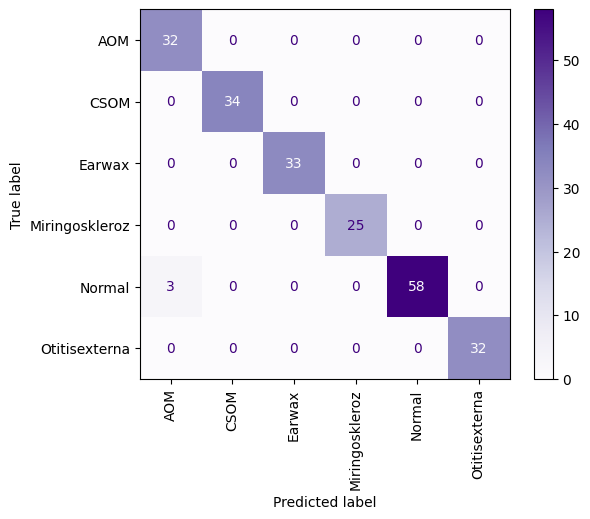

In [143]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Purples, values_format = 'g',xticks_rotation = 'vertical')
plt.savefig("cf_mobilenet_trainable.png")
plt.show()

In [144]:
df1 = pd.DataFrame(cm)
print(df1)

    0   1   2   3   4   5
0  32   0   0   0   0   0
1   0  34   0   0   0   0
2   0   0  33   0   0   0
3   0   0   0  25   0   0
4   3   0   0   0  58   0
5   0   0   0   0   0  32


In [145]:
class_labels = target_names
class_labels

['AOM', 'CSOM', 'Earwax', 'Miringoskleroz', 'Normal', 'Otitisexterna']

In [146]:
report = classification_report(test_labels_encoded, y_pred_class_loaded, target_names=class_labels)
print(report)

                precision    recall  f1-score   support

           AOM       0.91      1.00      0.96        32
          CSOM       1.00      1.00      1.00        34
        Earwax       1.00      1.00      1.00        33
Miringoskleroz       1.00      1.00      1.00        25
        Normal       1.00      0.95      0.97        61
 Otitisexterna       1.00      1.00      1.00        32

      accuracy                           0.99       217
     macro avg       0.99      0.99      0.99       217
  weighted avg       0.99      0.99      0.99       217



In [147]:
report_dic = classification_report(test_labels_encoded, y_pred_class_loaded, target_names=class_labels, output_dict=True)
print(report_dic)

{'AOM': {'precision': 0.9142857142857143, 'recall': 1.0, 'f1-score': 0.955223880597015, 'support': 32}, 'CSOM': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 34}, 'Earwax': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 33}, 'Miringoskleroz': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 25}, 'Normal': {'precision': 1.0, 'recall': 0.9508196721311475, 'f1-score': 0.9747899159663865, 'support': 61}, 'Otitisexterna': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 32}, 'accuracy': 0.9861751152073732, 'macro avg': {'precision': 0.9857142857142858, 'recall': 0.9918032786885246, 'f1-score': 0.9883356327605669, 'support': 217}, 'weighted avg': {'precision': 0.9873601053324557, 'recall': 0.9861751152073732, 'f1-score': 0.9863103642997884, 'support': 217}}


In [148]:
#from tensorflow.keras.utils import to_categorical
y_true = test_labels_encoded
#y_test = to_categorical(y_true)

In [149]:
specificity_classes = specificity_score(y_true, y_pred_class_loaded, average=None)
sensitivity_classes = sensitivity_score(y_true, y_pred_class_loaded, average=None)
Precision_classes = precision_score(y_true, y_pred_class_loaded, average=None)
Recall_classes = recall_score(y_true, y_pred_class_loaded, average=None)
f1_score_classes = f1_score(y_true, y_pred_class_loaded, average=None)
Roc_score_classes = roc_auc_score(y_true,Y_pred_loaded,multi_class='ovr',average=None)

In [150]:
print("specificity: "+ str(specificity_classes))
print("sensitivity: "+ str(sensitivity_classes))
print("Precision: "+ str(Precision_classes))
print("Recall: "+ str(Recall_classes))
print("Roc score: " + str(Roc_score_classes))
print("f1_score: "+ str(f1_score_classes))

specificity: [0.98378378 1.         1.         1.         1.         1.        ]
sensitivity: [1.         1.         1.         1.         0.95081967 1.        ]
Precision: [0.91428571 1.         1.         1.         1.         1.        ]
Recall: [1.         1.         1.         1.         0.95081967 1.        ]
Roc score: [0.99983108 1.         1.         1.         0.99968474 1.        ]
f1_score: [0.95522388 1.         1.         1.         0.97478992 1.        ]


In [151]:
dict = {'specificity': specificity_classes, 'sensitivity': sensitivity_classes, 'Precision': Precision_classes, 'Recall': Recall_classes, 'f1_score': f1_score_classes, 'Roc score': Roc_score_classes} 
df_metrics = pd.DataFrame(dict)
df_metrics = df_metrics.set_axis(class_labels)
print(df_metrics)

                specificity  sensitivity  Precision   Recall  f1_score  \
AOM                0.983784      1.00000   0.914286  1.00000  0.955224   
CSOM               1.000000      1.00000   1.000000  1.00000  1.000000   
Earwax             1.000000      1.00000   1.000000  1.00000  1.000000   
Miringoskleroz     1.000000      1.00000   1.000000  1.00000  1.000000   
Normal             1.000000      0.95082   1.000000  0.95082  0.974790   
Otitisexterna      1.000000      1.00000   1.000000  1.00000  1.000000   

                Roc score  
AOM              0.999831  
CSOM             1.000000  
Earwax           1.000000  
Miringoskleroz   1.000000  
Normal           0.999685  
Otitisexterna    1.000000  


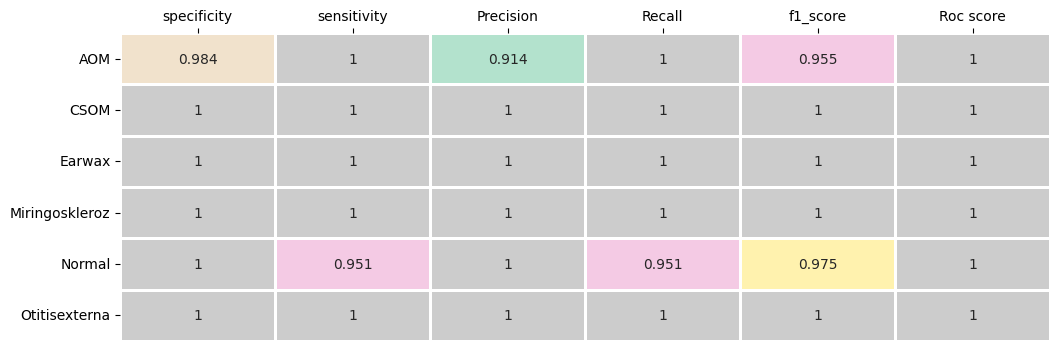

In [152]:
plt.figure(figsize=(12,4))
ax=sns.heatmap(df_metrics,cbar=False, annot=True, fmt=".3g", cmap= 'Pastel2', linewidths = 1 )
plt.savefig("metrics_mobilenet_trainable.png")
ax.xaxis.tick_top()

In [153]:
df_metrics.to_excel('metrics_mobilenet_trainable.xlsx', index = True)
df_metrics

,specificity,sensitivity,Precision,Recall,f1_score,Roc score
AOM,0.983784,1.00000,0.914286,1.00000,0.955224,0.999831
CSOM,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000
Earwax,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000
Miringoskleroz,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000
Normal,1.000000,0.95082,1.000000,0.95082,0.974790,0.999685
Otitisexterna,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000


In [154]:
specificity = specificity_score(y_true, y_pred_class_loaded, average='weighted')
sensitivity = sensitivity_score(y_true, y_pred_class_loaded, average='weighted')
Precision = precision_score(y_true, y_pred_class_loaded, average='weighted')
Recall = recall_score(y_true, y_pred_class_loaded, average='weighted')
Roc_score = roc_auc_score(y_true,Y_pred_loaded,multi_class='ovr',average='weighted')
accuracy = accuracy_score(y_true, y_pred_class_loaded)
f1_score = f1_score(y_true, y_pred_class_loaded, average='weighted')

In [155]:
print("weighted specificity: "+ str(specificity))
print("weighted sensitivity: "+ str(sensitivity))
print("weighted Precision: "+ str(Precision))
print("weighted Recall: "+ str(Recall))
print("weighted Roc score: " + str(Roc_score))
print("Accuracy: " + str(accuracy))
print("weighted f1_score: "+ str(f1_score))

weighted specificity: 0.9976086685764105
weighted sensitivity: 0.9861751152073732
weighted Precision: 0.9873601053324557
weighted Recall: 0.9861751152073732
weighted Roc score: 0.9998864692413079
Accuracy: 0.9861751152073732
weighted f1_score: 0.9863103642997884


In [156]:
print("Macro specificity: "+ str(specificity_score(y_true, y_pred_class_loaded, average='macro')))
print("Macro sensitivity: "+ str(sensitivity_score(y_true, y_pred_class_loaded, average='macro')))
print("Macro Precision: "+ str(precision_score(y_true, y_pred_class_loaded, average='macro')))
print("Macro Recall: "+ str(recall_score(y_true, y_pred_class_loaded, average='macro')))
print("Macro Roc score: " + str(roc_auc_score(y_true,Y_pred_loaded,multi_class='ovr',average='macro')))
#print("Macro f1_score: "+ str(f1_score(y_true, y_pred_class_loaded, average='macro')))

Macro specificity: 0.9972972972972972
Macro sensitivity: 0.9918032786885246
Macro Precision: 0.9857142857142858
Macro Recall: 0.9918032786885246
Macro Roc score: 0.9999193037615169


In [157]:
print("Micro specificity: "+ str(specificity_score(y_true, y_pred_class_loaded, average='micro')))
print("Micro sensitivity: "+ str(sensitivity_score(y_true, y_pred_class_loaded, average='micro')))
print("Micro Precision: "+ str(precision_score(y_true, y_pred_class_loaded, average='micro')))
print("Micro Recall: "+ str(recall_score(y_true, y_pred_class_loaded, average='micro')))
print("Micro Roc score: " + str(roc_auc_score(y_true,Y_pred_loaded,multi_class='ovr',average='micro')))
#print("Micro f1_score: "+ str(f1_score(y_true, y_pred_class_loaded, average='micro')))

Micro specificity: 0.9972350230414746
Micro sensitivity: 0.9861751152073732
Micro Precision: 0.9861751152073732
Micro Recall: 0.9861751152073732
Micro Roc score: 0.9995880141859033


In [158]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(6):
    r = roc_auc_score(y_test[:, i], Y_pred_loaded[:, i])
    print("The ROC AUC score of "+target_names[i]+" is: "+str(r))

The ROC AUC score of AOM is: 0.9998310810810811
The ROC AUC score of CSOM is: 1.0
The ROC AUC score of Earwax is: 1.0
The ROC AUC score of Miringoskleroz is: 1.0
The ROC AUC score of Normal is: 0.9996847414880201
The ROC AUC score of Otitisexterna is: 1.0


In [159]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], Y_pred_loaded[:, i], drop_intermediate=False)
    roc_auc[i] = auc(fpr[i], tpr[i])

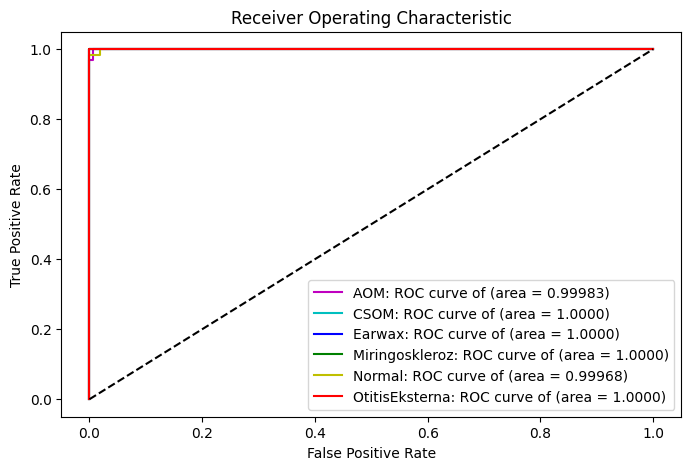

In [160]:
plt.figure(figsize=(8,5))

plt.plot(fpr[0], tpr[0],'m',label='AOM: ROC curve of (area = %0.5f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1],'c',label='CSOM: ROC curve of (area = %0.4f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2],'b',label='Earwax: ROC curve of (area = %0.4f)' % roc_auc[2])
plt.plot(fpr[3], tpr[3],'g',label='Miringoskleroz: ROC curve of (area = %0.4f)' % roc_auc[3])
plt.plot(fpr[4], tpr[4],'y',label='Normal: ROC curve of (area = %0.5f)' % roc_auc[4])
plt.plot(fpr[5], tpr[5],'r',label='OtitisEksterna: ROC curve of (area = %0.4f)' % roc_auc[5])

plt.plot([0, 1], [0, 1], 'k--')
#plt.xlim([-0.1, 1.1])
#plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("ROC_mobilenet_classes.png")
plt.show()

In [161]:
# Compute ROC curve and ROC area for each class
precision = {}
recall = {}
precision_recall = {}
for i in range(6):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], Y_pred_loaded[:, i])
    precision_recall[i] = auc(recall[i], precision[i])

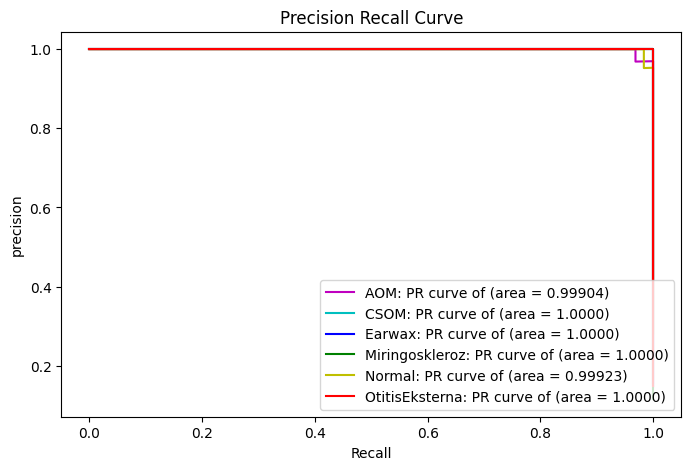

In [162]:
plt.figure(figsize=(8,5))

plt.plot(recall[0], precision[0],'m',label='AOM: PR curve of (area = %0.5f)' % precision_recall[0])
plt.plot(recall[1], precision[1],'c',label='CSOM: PR curve of (area = %0.4f)' % precision_recall[1])
plt.plot(recall[2], precision[2],'b',label='Earwax: PR curve of (area = %0.4f)' % precision_recall[2])
plt.plot(recall[3], precision[3],'g',label='Miringoskleroz: PR curve of (area = %0.4f)' % precision_recall[3])
plt.plot(recall[4], precision[4],'y',label='Normal: PR curve of (area = %0.5f)' % precision_recall[4])
plt.plot(recall[5], precision[5],'r',label='OtitisEksterna: PR curve of (area = %0.4f)' % precision_recall[5])

#plt.plot([1, 0], [0, 1], 'k--')
#plt.xlim([-0.1, 1.1])
#plt.ylim([-0.1, 1.1])
plt.xlabel('Recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")
plt.savefig("PR_mobilenet_classes1.png")
plt.show()

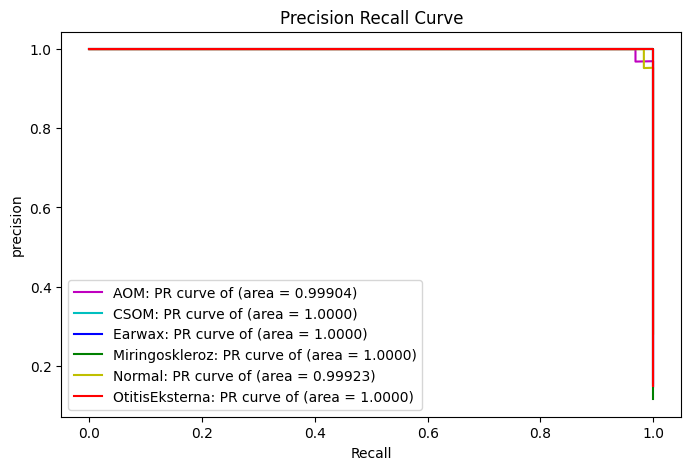

In [163]:
plt.figure(figsize=(8,5))

plt.plot(recall[0], precision[0],'m',label='AOM: PR curve of (area = %0.5f)' % precision_recall[0])
plt.plot(recall[1], precision[1],'c',label='CSOM: PR curve of (area = %0.4f)' % precision_recall[1])
plt.plot(recall[2], precision[2],'b',label='Earwax: PR curve of (area = %0.4f)' % precision_recall[2])
plt.plot(recall[3], precision[3],'g',label='Miringoskleroz: PR curve of (area = %0.4f)' % precision_recall[3])
plt.plot(recall[4], precision[4],'y',label='Normal: PR curve of (area = %0.5f)' % precision_recall[4])
plt.plot(recall[5], precision[5],'r',label='OtitisEksterna: PR curve of (area = %0.4f)' % precision_recall[5])

#plt.plot([1, 0], [0, 1], 'k--')
#plt.xlim([-0.1, 1.1])
#plt.ylim([-0.1, 1.1])
plt.xlabel('Recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower left")
plt.savefig("PR_mobilenet_classes2.png")
plt.show()

In [164]:
Classification_report = pd.DataFrame.from_dict(report_dic)

In [165]:
Classification_report

,AOM,CSOM,Earwax,Miringoskleroz,Normal,Otitisexterna,accuracy,macro avg,weighted avg
precision,0.914286,1.0,1.0,1.0,1.00000,1.0,0.986175,0.985714,0.987360
recall,1.000000,1.0,1.0,1.0,0.95082,1.0,0.986175,0.991803,0.986175
f1-score,0.955224,1.0,1.0,1.0,0.97479,1.0,0.986175,0.988336,0.986310
support,32.000000,34.0,33.0,25.0,61.00000,32.0,0.986175,217.000000,217.000000


In [166]:
Classification_report.to_excel('classification_report_mobilenet_trainable.xlsx', index = True)

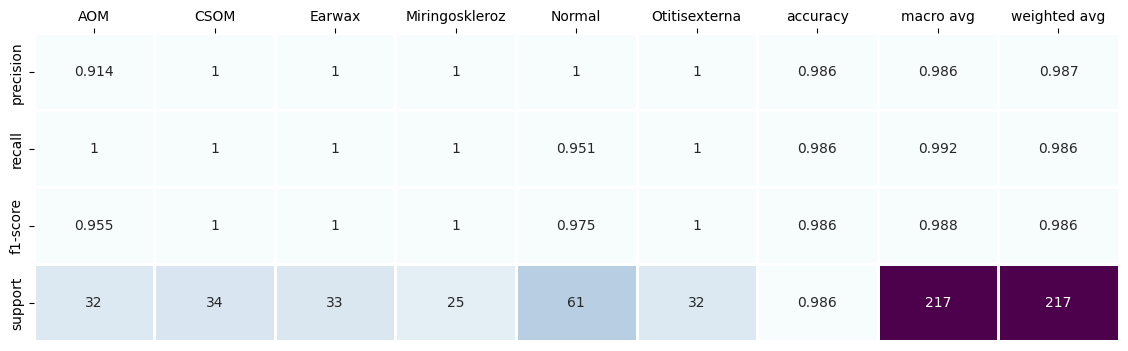

In [167]:
df = pd.read_excel('classification_report_mobilenet_trainable.xlsx',index_col=[0])
plt.figure(figsize=(14,4))
ax = sns.heatmap(df,cbar=False, annot=True, fmt=".3g", cmap= 'BuPu', linewidths = 1 )
ax.xaxis.tick_top()
plt.savefig("cr_mobilenet_trainable.png")

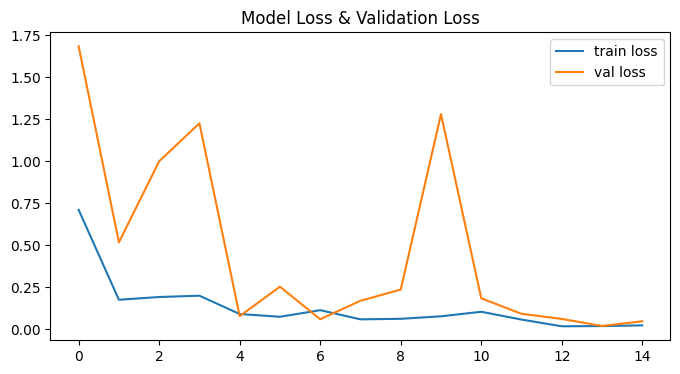

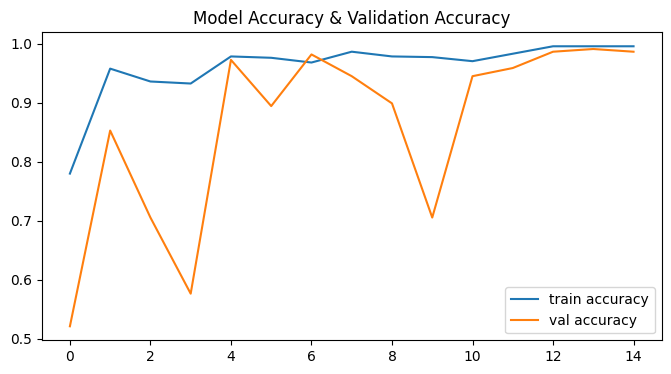

In [168]:
# plotting loss and accuracy
plt.figure(figsize=(8,4))
plt.plot(hist.history['loss'], label = 'train loss')
plt.plot(hist.history['val_loss'], label = 'val loss')
plt.title('Model Loss & Validation Loss')
plt.legend(loc="upper right")
plt.savefig("loss_mobilenet_trainable.png")
plt.show()

plt.figure(figsize=(8,4))
plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val accuracy')
#plt.ylim([0.3, 1])
plt.title('Model Accuracy & Validation Accuracy')
plt.legend(loc="lower right")
plt.savefig("accuracy_mobilenet_trainable.png")
plt.show()

In [169]:
tpr={}
fpr={}
roc_auc1={}
fpr["weighted"], tpr["weighted"], _ = roc_curve(y_test.ravel(), Y_pred_loaded.ravel())
roc_auc1["weighted"] = auc(fpr["weighted"], tpr["weighted"])
print("weighted Roc score: " + str(roc_auc1["weighted"]))

weighted Roc score: 0.9995880141859033


In [170]:
'''
tpr2={}
fpr2={}
roc_auc2={}
fpr2["weighted"], tpr2["weighted"], _ = roc_curve(y_test.ravel(), Y_pred_loaded.ravel())
roc_auc2["weighted"] = auc(fpr2["weighted"], tpr2["weighted"])
print("weighted Roc score: " + str(roc_auc2["weighted"]))
'''

'\ntpr2={}\nfpr2={}\nroc_auc2={}\nfpr2["weighted"], tpr2["weighted"], _ = roc_curve(y_test.ravel(), Y_pred_loaded.ravel())\nroc_auc2["weighted"] = auc(fpr2["weighted"], tpr2["weighted"])\nprint("weighted Roc score: " + str(roc_auc2["weighted"]))\n'

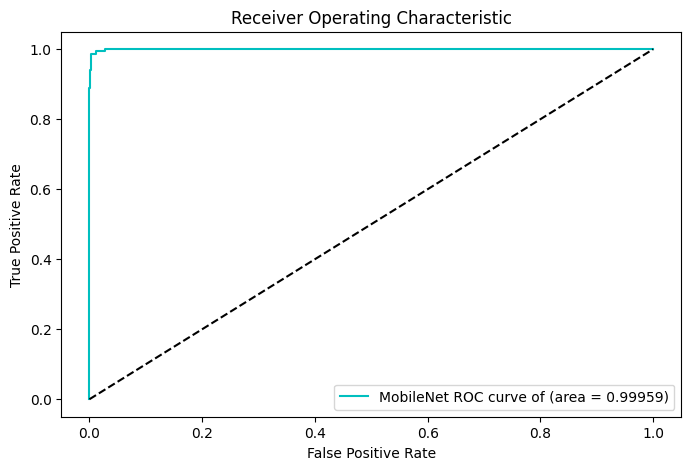

In [171]:
plt.figure(figsize=(8,5))

plt.plot(fpr['weighted'], tpr['weighted'],'c',label='MobileNet ROC curve of (area = %0.5f)' % roc_auc1['weighted'])
#plt.plot(fpr2['weighted'], tpr2['weighted'],'b',label='DenseNet169 ROC curve of (area = %0.5f)' % roc_auc2['weighted'])

plt.plot([0, 1], [0, 1], 'k--')
#plt.xlim([-0.1, 1.1])
#plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("ROC_mobilenet.png")
plt.show()

In [172]:
precision1={}
recall1={}
precision_recall1={}
precision1["weighted"], recall1["weighted"], _ = precision_recall_curve(y_test.ravel(), Y_pred_loaded.ravel())
precision_recall1["weighted"] = auc(recall1["weighted"], precision1["weighted"])
print("PR score: " + str(precision_recall1["weighted"]))

PR score: 0.9980072405679581


In [173]:
'''
precision2={}
recall2={}
precision_recall2={}
precision2["weighted"], recall2["weighted"], _ = precision_recall_curve(y_test.ravel(), Y_pred_loaded.ravel())
precision_recall2["weighted"] = auc(recall2["weighted"], precision2["weighted"])
print("PR score: " + str(precision_recall2["weighted"]))
'''

'\nprecision2={}\nrecall2={}\nprecision_recall2={}\nprecision2["weighted"], recall2["weighted"], _ = precision_recall_curve(y_test.ravel(), Y_pred_loaded.ravel())\nprecision_recall2["weighted"] = auc(recall2["weighted"], precision2["weighted"])\nprint("PR score: " + str(precision_recall2["weighted"]))\n'

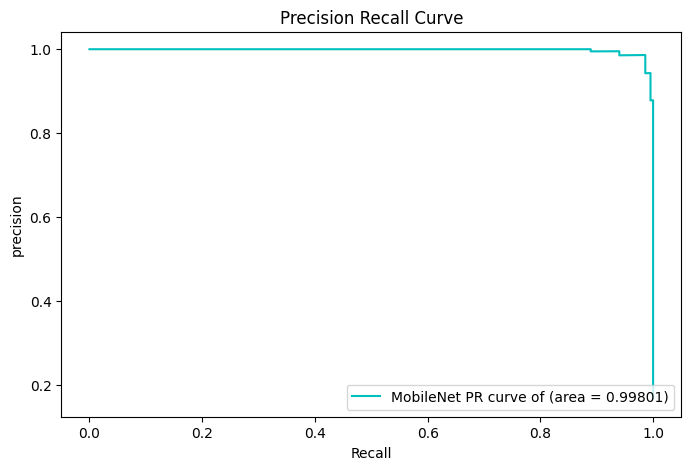

In [174]:
plt.figure(figsize=(8,5))

plt.plot(recall1['weighted'], precision1['weighted'],'c',label='MobileNet PR curve of (area = %0.5f)' % precision_recall1['weighted'])
#plt.plot(recall2['weighted'], precision2['weighted'],'b',label='DenseNet169 PR curve of (area = %0.5f)' % precision_recall2['weighted'])

#plt.plot([1, 0], [0, 1], 'k--')
#plt.xlim([-0.1, 1.1])
#plt.ylim([-0.1, 1.1])
plt.xlabel('Recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")
plt.savefig("PR_mobilenet1.png")
plt.show()

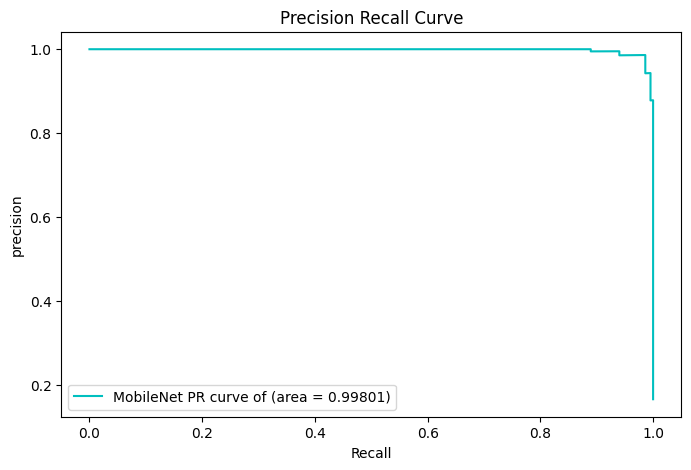

In [175]:
plt.figure(figsize=(8,5))

plt.plot(recall1['weighted'], precision1['weighted'],'c',label='MobileNet PR curve of (area = %0.5f)' % precision_recall1['weighted'])
#plt.plot(recall2['weighted'], precision2['weighted'],'b',label='DenseNet169 PR curve of (area = %0.5f)' % precision_recall2['weighted'])

#plt.plot([1, 0], [0, 1], 'k--')
#plt.xlim([-0.1, 1.1])
#plt.ylim([-0.1, 1.1])
plt.xlabel('Recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower left")
plt.savefig("PR_mobilenet2.png")
plt.show()

In [176]:
accuracies = []
accuracies.append(accuracy)
specificitys = [] 
specificitys.append(specificity)
sensitivitys = [] 
sensitivitys.append(sensitivity)
Precisions = [] 
Precisions.append(Precision)
Recalls = [] 
Recalls.append(Recall)
f1_scores = []
f1_scores.append(f1_scores)
Roc_scores = [] 
Roc_scores.append(Roc_score)

In [177]:
df_total = df1

## 5 trails

In [252]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Checkpoint to save best model per epoch
model_file_path2 = "saved_models/model1_mobilenet_trials-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint2 = ModelCheckpoint(
    filepath=model_file_path2,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

In [253]:
input_shape = (224,224,3)
model = tf.keras.applications.MobileNet(input_shape = input_shape,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classifier_activation="softmax",
)

#model.trainable = False

global_average_pooling = GlobalAveragePooling2D()(model.output)
fc1 = Dense(units = 55, activation = 'tanh', name = 'Dense1_tuned')(global_average_pooling)
dropout1 = Dropout(rate = 0.2, 
                      # seed = 123, 
                   name = 'dropout_tuned')(fc1)
fc2 = Dense(units = 50, activation = 'relu' , name = 'Dense2_tuned')(dropout1)
    
output_layer = Dense(6, activation = 'softmax', name = 'output_layer')(fc2)
model_trails = Model(model.input, output_layer)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate = 0.0007,
            decay_steps=300,
            decay_rate=0.9)

model_trails.compile(optimizer= Adam(learning_rate=lr_schedule), loss='categorical_crossentropy',metrics=['accuracy'])

In [254]:
%time hist_trails = model_trails.fit(train_images, y_train, epochs=15, validation_data = (test_images,y_test), callbacks=[checkpoint2], verbose=1,batch_size = 16)

Epoch 1/15
54/55 [============================>.] - ETA: 0s - loss: 0.7922 - accuracy: 0.7338
Epoch 1: val_accuracy improved from -inf to 0.22581, saving model to saved_models/model1_mobilenet_trials-01-0.2258.h5
55/55 [==============================] - 16s 86ms/step - loss: 0.7918 - accuracy: 0.7336 - val_loss: 2.6459 - val_accuracy: 0.2258
Epoch 2/15
54/55 [============================>.] - ETA: 0s - loss: 0.2648 - accuracy: 0.9167
Epoch 2: val_accuracy improved from 0.22581 to 0.25346, saving model to saved_models/model1_mobilenet_trials-02-0.2535.h5
55/55 [==============================] - 4s 69ms/step - loss: 0.2701 - accuracy: 0.9150 - val_loss: 3.0137 - val_accuracy: 0.2535
Epoch 3/15
54/55 [============================>.] - ETA: 0s - loss: 0.1633 - accuracy: 0.9525
Epoch 3: val_accuracy improved from 0.25346 to 0.38249, saving model to saved_models/model1_mobilenet_trials-03-0.3825.h5
55/55 [==============================] - 4s 69ms/step - loss: 0.1642 - accuracy: 0.9518 - val_

In [255]:
model_trails = load_model(r'/kaggle/working/saved_models/model1_mobilenet_trials-11-0.9816.h5')

In [256]:
Y_pred_trails = model_trails.predict(test_images)
y_pred_class_trails = np.argmax(Y_pred_trails ,  axis = 1)

7/7 [==============================] - 1s 41ms/step


In [257]:
loss, acc = model_trails.evaluate(test_images,y_test)

7/7 [==============================] - 1s 35ms/step - loss: 0.0578 - accuracy: 0.9816


In [258]:
accuracy_trails = accuracy_score(test_labels_encoded, y_pred_class_trails)
accuracy_trails

0.9815668202764977

In [259]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['AOM', 'CSOM', 'Earwax','Miringoskleroz','Normal','Otitisexterna']
label_names = [0,1,2,3,4,5]

cm_trails = confusion_matrix(test_labels_encoded, y_pred_class_trails, labels = label_names)

print('Confusion Matrix')
print(confusion_matrix(test_labels_encoded, y_pred_class_trails))

print('classification_Report')
print(classification_report(test_labels_encoded, y_pred_class_trails, target_names=target_names))

Confusion Matrix
[[32  0  0  0  0  0]
 [ 0 34  0  0  0  0]
 [ 0  0 33  0  0  0]
 [ 0  0  0 25  0  0]
 [ 4  0  0  0 57  0]
 [ 0  0  0  0  0 32]]
classification_Report
                precision    recall  f1-score   support

           AOM       0.89      1.00      0.94        32
          CSOM       1.00      1.00      1.00        34
        Earwax       1.00      1.00      1.00        33
Miringoskleroz       1.00      1.00      1.00        25
        Normal       1.00      0.93      0.97        61
 Otitisexterna       1.00      1.00      1.00        32

      accuracy                           0.98       217
     macro avg       0.98      0.99      0.98       217
  weighted avg       0.98      0.98      0.98       217



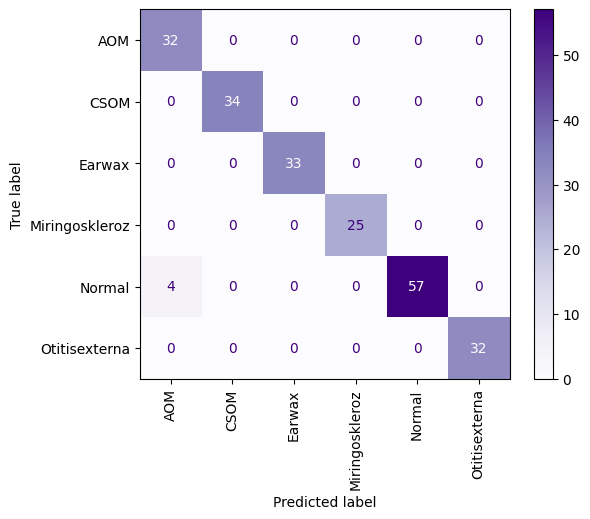

In [260]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm_trails, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Purples, values_format = 'g',xticks_rotation = 'vertical')
#plt.savefig("cf_mobilenet_trials.png")
plt.show()

In [261]:

df2 = pd.DataFrame(cm_trails)
#print(df2)
df_total = df_total + df2
print(df_total)
'''
df3 = pd.DataFrame(cm_trails)
print(df3)
df_total = df_total + df3
print(df_total)
'''
'''
df4 = pd.DataFrame(cm_trails)
print(df4)
df_total = df_total + df4
print(df_total)
'''
'''
df5 = pd.DataFrame(cm_trails)
print(df5)
df_total = df_total + df5
print(df_total)
'''

     0    1    2    3    4    5
0  158    0    0    0    2    0
1    2  167    1    0    0    0
2    0    0  165    0    0    0
3    0    0    0  125    0    0
4   11    0    0    1  293    0
5    0    1    0    0    0  159


'\ndf5 = pd.DataFrame(cm_trails)\nprint(df5)\ndf_total = df_total + df5\nprint(df_total)\n'

In [262]:
specificity_trails = specificity_score(y_true, y_pred_class_trails, average='weighted')
sensitivity_trails = sensitivity_score(y_true, y_pred_class_trails, average='weighted')
Precision_trails = precision_score(y_true, y_pred_class_trails, average='weighted')
Recall_trails = recall_score(y_true, y_pred_class_trails, average='weighted')
Roc_score_trails = roc_auc_score(y_true,Y_pred_trails,multi_class='ovr',average='weighted')
#f1_score_trails = f1_score(y_true, y_pred_class_trails, average='weighted')

In [263]:
accuracies.append(accuracy_trails)
specificitys.append(specificity_trails)
sensitivitys.append(sensitivity_trails)
Precisions.append(Precision_trails)
Recalls.append(Recall_trails)
Roc_scores.append(Roc_score_trails)
#f1_scores.append(f1_score_trails)

In [264]:
print("Accuracy: " ,accuracies)
print("weighted specificity: ",specificitys)
print("weighted sensitivity: ",sensitivitys)
print("weighted Precision: ",Precisions)
print("weighted Recall: ",Recalls)
print("weighted Roc score: " ,Roc_scores)
#print("weighted f1_score: ",f1_scores)

Accuracy:  [0.9861751152073732, 0.9769585253456221, 0.9861751152073732, 0.9861751152073732, 0.9815668202764977]
weighted specificity:  [0.9976086685764105, 0.9962115196994229, 0.9955398910977971, 0.9975792913731202, 0.9968115581018807]
weighted sensitivity:  [0.9861751152073732, 0.9769585253456221, 0.9861751152073732, 0.9861751152073732, 0.9815668202764977]
weighted Precision:  [0.9873601053324557, 0.9791838985387372, 0.9865993709311681, 0.9868528056383844, 0.9836149513568869]
weighted Recall:  [0.9861751152073732, 0.9769585253456221, 0.9861751152073732, 0.9861751152073732, 0.9815668202764977]
weighted Roc score:  [0.9998864692413079, 0.9998505417860257, 0.9994444817025462, 0.9995736817483996, 0.9998864692413079]


## final results

In [265]:
folds = ['trial1', 'trial2', 'trial3', 'trial4', 'trial5']

In [266]:
#'f1_score': f1_scores

In [267]:
dict = {'specificity': specificitys, 'sensitivity': sensitivitys, 'Precision': Precisions, 'Recall': Recalls,'Roc score': Roc_scores, 'accuracy': accuracies} 
df_metrics_fold = pd.DataFrame(dict)
df_metrics_fold

,specificity,sensitivity,Precision,Recall,Roc score,accuracy
0,0.997609,0.986175,0.987360,0.986175,0.999886,0.986175
1,0.996212,0.976959,0.979184,0.976959,0.999851,0.976959
2,0.995540,0.986175,0.986599,0.986175,0.999444,0.986175
3,0.997579,0.986175,0.986853,0.986175,0.999574,0.986175
4,0.996812,0.981567,0.983615,0.981567,0.999886,0.981567


In [268]:
df_metrics_fold = df_metrics_fold.set_axis(folds)
print(df_metrics_fold)

        specificity  sensitivity  Precision    Recall  Roc score  accuracy
trial1     0.997609     0.986175   0.987360  0.986175   0.999886  0.986175
trial2     0.996212     0.976959   0.979184  0.976959   0.999851  0.976959
trial3     0.995540     0.986175   0.986599  0.986175   0.999444  0.986175
trial4     0.997579     0.986175   0.986853  0.986175   0.999574  0.986175
trial5     0.996812     0.981567   0.983615  0.981567   0.999886  0.981567


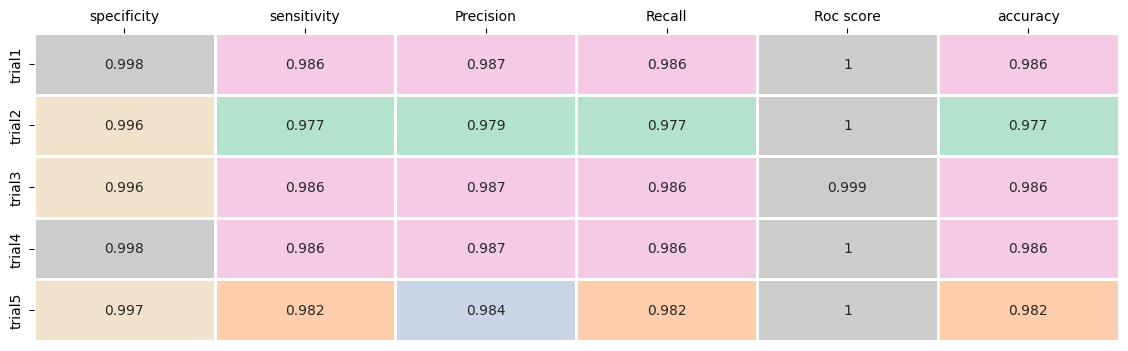

In [269]:
plt.figure(figsize=(14,4))
ax=sns.heatmap(df_metrics_fold,cbar=False, annot=True, fmt=".3g", cmap= 'Pastel2', linewidths = 1 )
plt.savefig("metrics_fold_mobilenet.png")
ax.xaxis.tick_top()

In [270]:
df_metrics_fold.to_excel('metrics_fold_mobilenet.xlsx', index = True)
df_metrics_fold

,specificity,sensitivity,Precision,Recall,Roc score,accuracy
trial1,0.997609,0.986175,0.987360,0.986175,0.999886,0.986175
trial2,0.996212,0.976959,0.979184,0.976959,0.999851,0.976959
trial3,0.995540,0.986175,0.986599,0.986175,0.999444,0.986175
trial4,0.997579,0.986175,0.986853,0.986175,0.999574,0.986175
trial5,0.996812,0.981567,0.983615,0.981567,0.999886,0.981567


In [271]:
cm_all = df_total.to_numpy()
cm_all

array([[158,   0,   0,   0,   2,   0],
       [  2, 167,   1,   0,   0,   0],
       [  0,   0, 165,   0,   0,   0],
       [  0,   0,   0, 125,   0,   0],
       [ 11,   0,   0,   1, 293,   0],
       [  0,   1,   0,   0,   0, 159]])

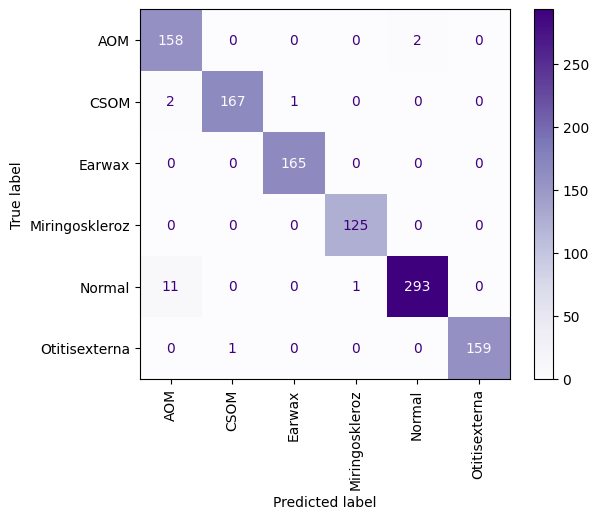

In [272]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm_all, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Purples, values_format = 'g',xticks_rotation = 'vertical')
plt.savefig("cf_mobilenet_total.png")
plt.show()

In [273]:
accuracies = np.array(accuracies)

In [274]:
for score in accuracies:
    print("Score for this fold is: ", score)

# report performance
print('Mean Accuracy: ', (np.mean(accuracies)))
print('STD: ', (np.std(accuracies)))


Score for this fold is:  0.9861751152073732
Score for this fold is:  0.9769585253456221
Score for this fold is:  0.9861751152073732
Score for this fold is:  0.9861751152073732
Score for this fold is:  0.9815668202764977
Mean Accuracy:  0.9834101382488478
STD:  0.0036866359447004448
